Final Project Part 3

Problem Statement: How is the Hong Kong-listed share price of ICBC (Industrial and Commercial Bank of China) associated with the price of a number of other assets as well as a few macro-economic and company-specific factors? 
Null Hypothesis: The share price of ICBC has no association with the price of the few assets or any of the macro-economic or company-specific factors under investigation.
Alternative Hypothesis: The share price of ICBC is associated with the price of a number of other assets and/or a few macro-economic and company-specific factors. 

Potential Methods and Models: I will attempt to use a multivariate linear regression model for this analysis, with the daily return of the share price of ICBC as the dependent variable and the daily return of a few other assets and the periodical change of a few macro-economic and company-specific factors as the independent variables. I will divide the data into a training set and a test set with an approximate 80%/20% breakdown. I will use the 20% of data in the test set to gauge the efficacy of the predictions made based on the model and parameters generated from the 80% of data in the training set.

Dataset: For the dependent variable, I have acquired 5 years of data of ICBC share price from Bloomberg (from July 2012 to July 2017). For the independent variables, I have also acquired the same 5 years of data on interest rates, interest rate differentials, equity index levels, foreign exchange spot levels, M2 growth YoY, New RMB Loans, company quarterly earnings, Tier 1 capital ratios, Non-Performing Loans (NPL) growth YoY from Bloomberg. 
With the above data, I finalized my dependent variable as the daily return of ICBC share price, and my independent variables as change in 1-year interest rate, change in 5-year minus 1-year interest rate differential, daily return of HSCEI index level, daily return of USDCNH spot fx level, China M2 growth year-on-year (YoY), China new loans growth YoY, ICBC earning growth YoY, ICBC Tier 1 capital ratio change from a year earlier and ICBC NPL growth YoY. 

Risks and Assumptions: One of the biggest challenges in handling the data comes from the fact that the independent variables are of different frequencies (some quarterly, some monthly and some daily). In order for them to match the daily frequency of the dependent variable (which is also the frequency I intend to have my analysis on primarily), I need to come up with certain assumptions and estimates on the datasets to fill in the missing values on a daily basis for the quarterly and monthly data, such as assuming a constant value throughout a certain period for some independent variables. This would inevitably introduce more uncertainties in the analysis.
Some other assumptions of the analysis include that asset prices have log-normal distributions, that the independent variables have low correlation with each other, the relationship between the dependent variable and the independent variables is linear, etc.

Goals and Criteria: The goal of this project is to reach a meaningful conclusion on how change in the independent variables can lead to change in the dependent variable, and that we can use this relationship to invest and achieve decent returns on the investment. If we can come up with a quantifiable relationship with linear coefficients of the independent variables laid out clearly for prediction on the dependent variable, and that the predicted outcomes based on the model and parameters from the training set are relatively close to the actual data in the test set, I would consider the analysis a success.

Understanding on the Project Domain: My understanding on the subject matter is that there is indeed an association among the changes in prices of different financial assets and several macro-economic and company-specific factors, with changes in certain asset prices and macro-economic/company-specific factors predictive of changes in other asset prices. I have not seen studies that incorporate factors across different domains (usually just one of asset prices/macro-economic factors/company-specific factors but not more than that). A multivariate linear regression model with factors from different domains is a good start to explore the association among the changes in different asset prices and a number of macro-economic/company-specific factors.

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics, model_selection
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
#Read in data from a csv file
data_raw = pd.read_csv('pxd_6.csv')

In [80]:
data_raw.head()

,Date,ICBC_Log_Ret,IR_Chg_1Y,IR_Chg_5Y1Y,HSCEI_Log_Ret,USDCNH_Log_Ret,M2_Growth_YoY,New_Loans_Growth_YoY,Earning_Growth_YoY,T1_Cap_Ratio_Chg,NPL_Growth_YoY
0,7/20/2012,0.0167,-0.0002,0.0000,0.0058,0.0005,0.1364,0.451,0.152,0.0039,0.0317
1,7/23/2012,-0.0216,0.0004,-0.0007,-0.0317,0.0019,0.1364,0.451,0.152,0.0039,0.0317
2,7/24/2012,-0.0024,-0.0001,0.0006,-0.0059,0.0002,0.1364,0.451,0.152,0.0039,0.0317
3,7/25/2012,0.0073,0.0000,-0.0004,0.0002,0.0003,0.1364,0.451,0.152,0.0039,0.0317
4,7/26/2012,-0.0048,0.0002,-0.0003,-0.0009,-0.0004,0.1364,0.451,0.152,0.0039,0.0317


In [4]:
data_raw.tail()

,Date,ICBC_Log_Ret,IR_Chg_1Y,IR_Chg_5Y1Y,HSCEI_Log_Ret,USDCNH_Log_Ret,M2_Growth_YoY,New_Loans_Growth_YoY,Earning_Growth_YoY,T1_Cap_Ratio_Chg,NPL_Growth_YoY
1226,7/17/2017,0.0038,0.0000,0.0000,0.0051,-0.0003,0.094,0.1159,0.0,0.0006,0.0164
1227,7/18/2017,0.0019,0.0003,-0.0001,-0.0026,-0.0021,0.094,0.1159,0.0,0.0006,0.0164
1228,7/19/2017,0.0075,0.0001,0.0000,0.0097,0.0014,0.094,0.1159,0.0,0.0006,0.0164
1229,7/20/2017,0.0075,-0.0002,-0.0002,-0.0013,-0.0005,0.094,0.1159,0.0,0.0006,0.0164
1230,7/21/2017,-0.0037,0.0001,0.0000,-0.0055,0.0008,0.094,0.1159,0.0,0.0006,0.0164


In [5]:
len(data_raw)

1231

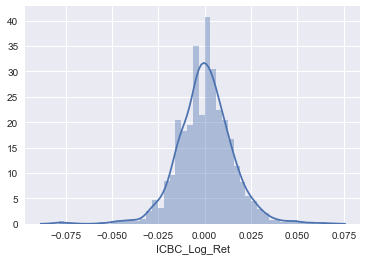

In [18]:
#Distribution plot of Dependent Variable
sns.distplot(data_raw["ICBC_Log_Ret"])

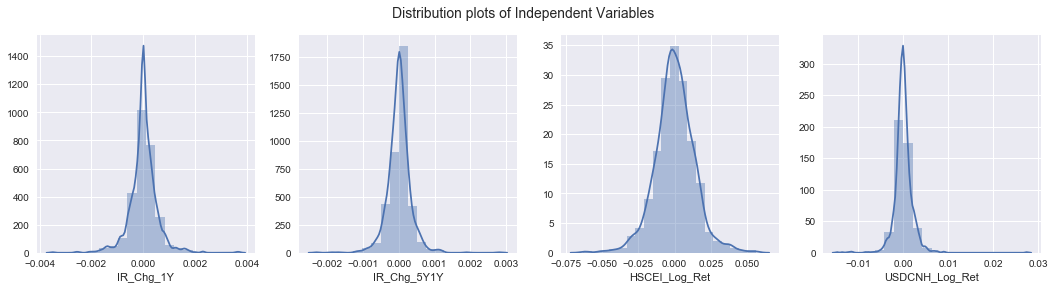

In [8]:
#Distribution plot of Independent Variables
fig, axs = plt.subplots(1, 4, figsize=(18,4))
sns.distplot(data_raw.IR_Chg_1Y, ax=axs[0], bins=20)
sns.distplot(data_raw.IR_Chg_5Y1Y, ax=axs[1], bins=20)
sns.distplot(data_raw.HSCEI_Log_Ret, ax=axs[2], bins=20)
sns.distplot(data_raw.USDCNH_Log_Ret, ax=axs[3], bins=20)
fig.suptitle("Distribution plots of Independent Variables", fontsize=14)
plt.show()

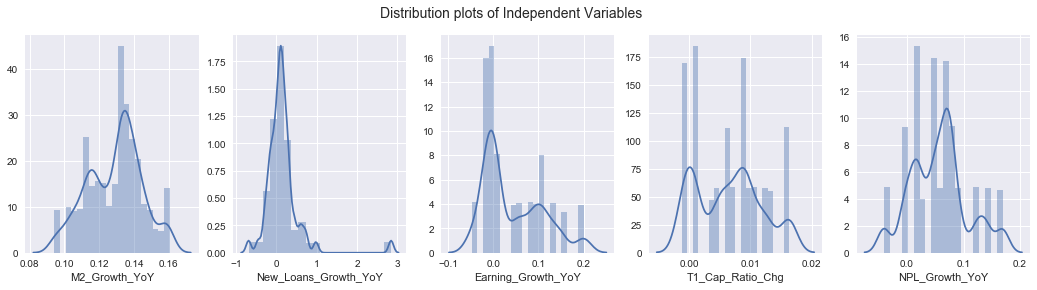

In [10]:
#Distribution plot of more Independent Variables
fig, axs = plt.subplots(1, 5, figsize=(18,4))
sns.distplot(data_raw.M2_Growth_YoY, ax=axs[0], bins=20)
sns.distplot(data_raw.New_Loans_Growth_YoY, ax=axs[1], bins=20)
sns.distplot(data_raw.Earning_Growth_YoY, ax=axs[2], bins=20)
sns.distplot(data_raw.T1_Cap_Ratio_Chg, ax=axs[3], bins=20)
sns.distplot(data_raw.NPL_Growth_YoY, ax=axs[4], bins=20)
fig.suptitle("Distribution plots of Independent Variables", fontsize=14)
plt.show()

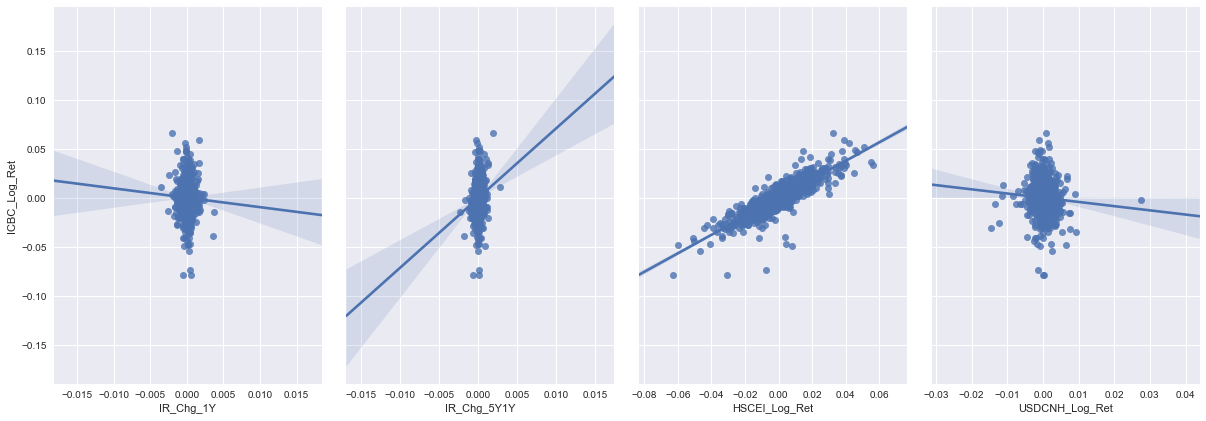

In [75]:
#Scatter plot of Dependent Variable against Independent Variables
sns.pairplot(data_raw, x_vars=['IR_Chg_1Y','IR_Chg_5Y1Y','HSCEI_Log_Ret', 'USDCNH_Log_Ret'], y_vars='ICBC_Log_Ret', size=6, aspect=0.7, kind='reg')
plt.show()

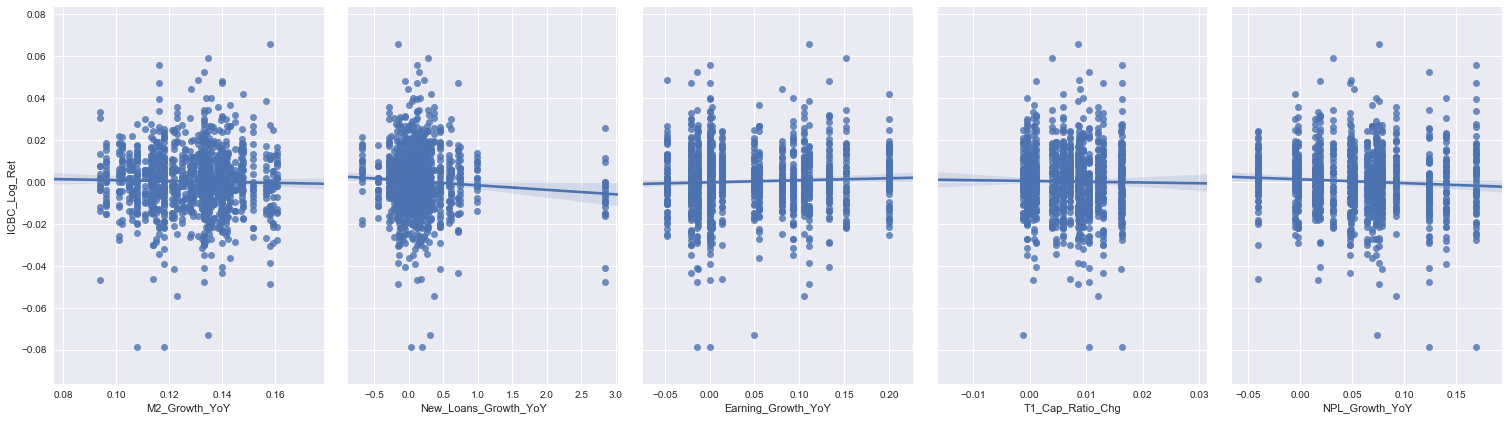

In [77]:
#Scatter plot of Dependent Variable against more Independent Variables
sns.pairplot(data_raw, x_vars=['M2_Growth_YoY','New_Loans_Growth_YoY','Earning_Growth_YoY', 'T1_Cap_Ratio_Chg', 'NPL_Growth_YoY'], y_vars='ICBC_Log_Ret', size=6, aspect=0.7, kind='reg')
plt.show()

In [30]:
#Correlation matrix of all variables
data_raw.corr()

,ICBC_Log_Ret,IR_Chg_1Y,IR_Chg_5Y1Y,HSCEI_Log_Ret,USDCNH_Log_Ret,M2_Growth_YoY,New_Loans_Growth_YoY,Earning_Growth_YoY,T1_Cap_Ratio_Chg,NPL_Growth_YoY
ICBC_Log_Ret,1.000000,-0.034661,0.156918,0.870885,-0.060591,-0.022820,-0.065739,0.043155,-0.013082,-0.060628
IR_Chg_1Y,-0.034661,1.000000,-0.357682,-0.021264,-0.016022,0.051528,0.008503,0.029066,-0.021515,-0.044362
IR_Chg_5Y1Y,0.156918,-0.357682,1.000000,0.177006,-0.016581,-0.033022,-0.004501,-0.003012,-0.017993,-0.009313
HSCEI_Log_Ret,0.870885,-0.021264,0.177006,1.000000,-0.059301,-0.025791,-0.043422,0.036459,-0.023278,-0.060241
USDCNH_Log_Ret,-0.060591,-0.016022,-0.016581,-0.059301,1.000000,-0.022410,0.049915,-0.047603,0.012794,0.050776
M2_Growth_YoY,-0.022820,0.051528,-0.033022,-0.025791,-0.022410,1.000000,-0.009178,0.501407,-0.053860,-0.074634
New_Loans_Growth_YoY,-0.065739,0.008503,-0.004501,-0.043422,0.049915,-0.009178,1.000000,-0.130572,0.025891,0.166635
Earning_Growth_YoY,0.043155,0.029066,-0.003012,0.036459,-0.047603,0.501407,-0.130572,1.000000,-0.251809,-0.199396
T1_Cap_Ratio_Chg,-0.013082,-0.021515,-0.017993,-0.023278,0.012794,-0.053860,0.025891,-0.251809,1.000000,0.469405
NPL_Growth_YoY,-0.060628,-0.044362,-0.009313,-0.060241,0.050776,-0.074634,0.166635,-0.199396,0.469405,1.000000


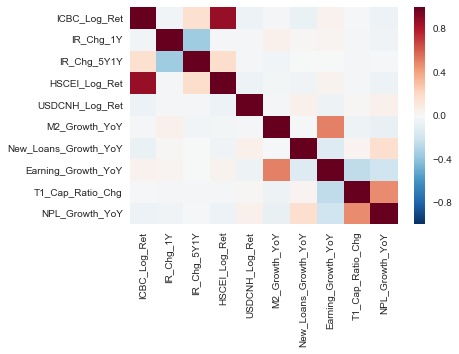

In [11]:
#Heatmap of correlations among all variables
sns.heatmap(data_raw[["ICBC_Log_Ret", "IR_Chg_1Y", "IR_Chg_5Y1Y", "HSCEI_Log_Ret", "USDCNH_Log_Ret", "M2_Growth_YoY", "New_Loans_Growth_YoY", "Earning_Growth_YoY", "T1_Cap_Ratio_Chg", "NPL_Growth_YoY"]].corr())

Further comments on data: I processed and cleaned up the data so that all data have the same frequency (daily) for the linear regression analysis. In the process, I have made assumptions on the lower frequency data in order to fill in the missing values. For the quarterly and monthly data, I used the same values throughout the period where there are no available data. In this case, the predictive power of such lower frequency data might be reduced significantly because of the stale values throughout the period during which the dependent variable (daily return of ICBC share price) changes on a daily basis. This limitation in the independent variables is difficult to overcome because macro-economic data or company-specific data do not get published on a more frequent basis. An alternative solution for this issue is to use linear interpolation or other estimation methods to come up with non-constant values to fill up the data in the period, however, there is no proven advantage of taking on such an approach and this could even potentially create more noises and uncertainties in the analysis on the association among the dependent variable and the independent variables.  

Findings from the Exploratory Data Analysis (EDA): 
Through different data visualization tools (distribution plot, scatter plot, correlation matrix and heatmap), I found that the dependent variable and most of the independent variables (those with daily and monthly data) have distributions that are close to a normal distribution although some have a certain degree of skew. The quarterly data exhibit less of such a feature (could be due to an insufficient number of data points). The visualization also shows that the dependent variable is more correlated to a few independent variables (could be positive or negative correlation) than some others, the two independent variables that stand out are HSCEI_Log_Ret and IR_Chg_5Y1Y. From the scattor plot, it further shows that the dependent variable has a relatively high degree of linear association with the independent variable HSCEI_Log_Ret. This will be tested further in the data modeling part later. 

DATA MODELING AND VALIDATION

In [22]:
#Divide dataset into a training set and a test set with 80%/20% breakdown
data_train, data_test = model_selection.train_test_split(data_raw, train_size=0.8, test_size=0.2)
print data_train.shape, data_test.shape

(984, 11) (247, 11)


In [85]:
#Use smf.ols to run a linear regression on the training set and get summary statistics
mlr = smf.ols(formula= "ICBC_Log_Ret ~ IR_Chg_1Y + IR_Chg_5Y1Y + HSCEI_Log_Ret + USDCNH_Log_Ret + M2_Growth_YoY + New_Loans_Growth_YoY + Earning_Growth_YoY + T1_Cap_Ratio_Chg + NPL_Growth_YoY", data=data_train).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ICBC_Log_Ret   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     349.6
Date:                Fri, 28 Jul 2017   Prob (F-statistic):          7.71e-298
Time:                        21:32:39   Log-Likelihood:                 3452.2
No. Observations:                 984   AIC:                            -6884.
Df Residuals:                     974   BIC:                            -6836.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0029      0.002      1.330      0.184      -0.001       0.007
IR_Chg_1Y               -0.1565      0.469     -0.334      0.739      -1.076       0.763
IR_Chg_5Y1Y              0.0684      0.759      0.090      0.928      -1.421       1.558
HSCEI_Log_Ret            0.9419      0.017     54.205      0.000       0.908       0.976
USDCNH_Log_Ret          -0.0218      0.111     -0.196      0.844      -0.240       0.196
M2_Growth_YoY           -0.0240      0.017     -1.381      0.168      -0.058       0.010
New_Loans_Growth_YoY    -0.0011      0.001     -1.943      0.052      -0.002    1.09e-05
Earning_Growth_YoY       0.0067      0.004      1.596      0.111      -0.002       0.015
T1_Cap_Ratio_Chg         0.0475      0.051      0.932      0.352      -0.053       0.148
NPL_Growth_YoY          -0.0012      0.005     -0.220      0.826      -0.012       0.009
==============================================================================
Omnibus:                      449.247   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9387.086
Skew:                          -1.583   Prob(JB):                         0.00
Kurtosis:                      17.796   Cond. No.                     3.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#Group the name of all independent variables together for later use
factors = ["IR_Chg_1Y", "IR_Chg_5Y1Y", "HSCEI_Log_Ret", "USDCNH_Log_Ret", "M2_Growth_YoY", "New_Loans_Growth_YoY", "Earning_Growth_YoY", "T1_Cap_Ratio_Chg", "NPL_Growth_YoY"]

In [84]:
#Use LinearRegression to train a linear model on the training set, which should yield the same result as using smf.ols
lm = LinearRegression().fit(data_train[factors], data_train["ICBC_Log_Ret"])
lm.coef_

array([-0.1565195 ,  0.06841698,  0.9418691 , -0.02180913, -0.02404967,
       -0.00108811,  0.00669678,  0.04753226, -0.00119367])

In [30]:
#Calculate the few most common metrics MAE, MSE, and RMSE for predictions on the training data based on the linear model trained earlier
train_preds = lm.predict(data_train[factors])

In [32]:
train_mae = metrics.mean_absolute_error(train_preds, data_train["ICBC_Log_Ret"])
print train_mae

0.00494597806784


In [34]:
train_mse = metrics.mean_squared_error(train_preds, data_train["ICBC_Log_Ret"])
print train_mse

5.25052867497e-05


In [38]:
train_rmse = np.sqrt(train_mse)
print train_rmse

0.0072460531843


In [40]:
#Calculate the few most common metrics MAE, MSE, and RMSE for predictions on the testing data based on the same linear model trained earlier
test_preds = lm.predict(data_test[factors])

In [41]:
test_mae = metrics.mean_absolute_error(test_preds, data_test["ICBC_Log_Ret"])
print test_mae

0.00490211244028


In [42]:
test_mse = metrics.mean_squared_error(test_preds, data_test["ICBC_Log_Ret"])
print test_mse

5.31002834617e-05


In [43]:
test_rmse = np.sqrt(test_mse)
print test_rmse

0.00728699413076


Using the entire dataset data_raw, perform 10 folds cross validation as K-fold validation is a common method in validating linear regression models. Compute the RMSE for each model fold and the overall mean RMSE.

In [46]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

In [47]:
rmse_list = []
for train_index, test_index in kf.split(data_raw):
    data_kf_train = data_raw.iloc[train_index]
    data_kf_test = data_raw.iloc[test_index]
    lm_kf = LinearRegression().fit(data_kf_train[factors], data_kf_train["ICBC_Log_Ret"])
    data_kf_preds = lm_kf.predict(data_kf_test[factors])
    rmse = np.sqrt(metrics.mean_squared_error(data_kf_preds, data_kf_test["ICBC_Log_Ret"]))
    rmse_list.append(rmse)
    print "RMSE:", rmse
print "Mean RMSE:", np.mean(rmse_list)

RMSE: 0.00685527157387
RMSE: 0.00632937050217
RMSE: 0.00643072626103
RMSE: 0.00902607446599
RMSE: 0.00699924126625
RMSE: 0.00650089255307
RMSE: 0.0097831114648
RMSE: 0.00749156874951
RMSE: 0.00704393093183
RMSE: 0.00572834393545
Mean RMSE: 0.0072188531704


Findings from the analysis: The linear regression analysis shows that 76.1% of the variance in the dependent variable can be explained by the change in the set of independent variables we have chosen (Adj R-Squared = 0.761). This is a relatively high reading on the explanation of variance of the dependent variable, but if we look further into the p-value and coefficient confidence interval of the independent variables in the linear regression result, only two independent variables (HSCEI_Log_Ret and New_Loans_Growth_YoY) have small p-values and have 95% confidence intervals of the coefficient not crossing 0. Therefore, these are the two independent variables that have the strongest linear association with the dependent variable. We can visualize on the relationship between these two independent variables and the dependent variable again (scatter plot, correlation matrix and heatmap below). The interpretation of the linear coefficients is that for every 1% increase in the log return of HSCEI index level and 1% increase in the year-on-year new loans growth rate, the log return of ICBC's share price should increase by 0.9419% - 0.0011% = 0.9408%. The other finding is that the Root Mean Squared Error (RMSE) in fitting the data on the training set, on the test set and in the k-fold validation process (mean RMSE in the validation) are all very close to each other (around 0.0072 for all 3). This implies that there have been no issue of over-fitting the data in our model. But on the other hand, the absolute value of the RMSE 0.0072 (0.72%) is relatively large in the context of our prediction on the dependent variable, and this could imply that the linear model has not performed that well on prediction on any of the data set. Further test (further below) on linear model with only two independent variables (HSCEI_Log_Ret and New_Loans_Growth_YoY) shows that RMSE is still around 0.0072 and could not be lowered further due to the limitation on the predictive power of the independent variables we have chosen. 

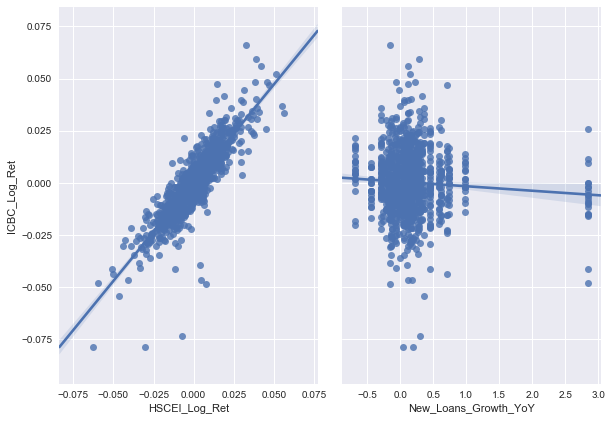

In [104]:
#Scatter plot of Dependent Variable against the two most relevant Independent Variables
sns.pairplot(data_raw, x_vars=['HSCEI_Log_Ret','New_Loans_Growth_YoY'], y_vars='ICBC_Log_Ret', size=6, aspect=0.7, kind='reg')
plt.show()

In [105]:
#Correlation matrix of the 3 variables
data_raw[['ICBC_Log_Ret', 'HSCEI_Log_Ret','New_Loans_Growth_YoY']].corr()

,ICBC_Log_Ret,HSCEI_Log_Ret,New_Loans_Growth_YoY
ICBC_Log_Ret,1.000000,0.870885,-0.065739
HSCEI_Log_Ret,0.870885,1.000000,-0.043422
New_Loans_Growth_YoY,-0.065739,-0.043422,1.000000


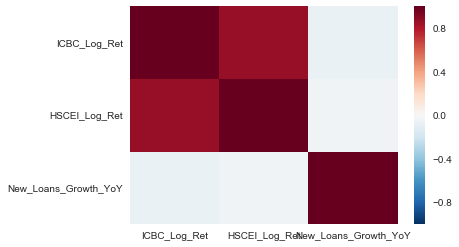

In [106]:
#Heatmap of the correlations among the 3 variables
sns.heatmap(data_raw[["ICBC_Log_Ret", "HSCEI_Log_Ret", "New_Loans_Growth_YoY"]].corr())

In [99]:
#Fit a new linear model with 2 independent variables
mlr1 = smf.ols(formula= "ICBC_Log_Ret ~  HSCEI_Log_Ret + New_Loans_Growth_YoY", data=data_train).fit()
mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ICBC_Log_Ret   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1577.
Date:                Fri, 28 Jul 2017   Prob (F-statistic):          3.59e-307
Time:                        22:37:44   Log-Likelihood:                 3450.4
No. Observations:                 984   AIC:                            -6895.
Df Residuals:                     981   BIC:                            -6880.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0004      0.000      1.456      0.146      -0.000       0.001
HSCEI_Log_Ret            0.9443      0.017     55.961      0.000       0.911       0.977
New_Loans_Growth_YoY    -0.0012      0.001     -2.220      0.027      -0.002      -0.000
==============================================================================
Omnibus:                      448.633   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9491.337
Skew:                          -1.576   Prob(JB):                         0.00
Kurtosis:                      17.885   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#Use LinearRegression to train a linear model with 2 independent variables on the training set
lm1 = LinearRegression().fit(data_train[["HSCEI_Log_Ret", "New_Loans_Growth_YoY"]], data_train["ICBC_Log_Ret"])
lm1.coef_

array([ 0.9442601 , -0.00121253])

In [101]:
train_preds1 = lm1.predict(data_train[["HSCEI_Log_Ret","New_Loans_Growth_YoY"]])

In [102]:
#Calculate the MSE and RMSE for predictions on the training data based on the new linear model
train_mse1 = metrics.mean_squared_error(train_preds1, data_train["ICBC_Log_Ret"])
print train_mse1
train_rmse1 = np.sqrt(train_mse1)
print train_rmse1

5.27027432505e-05
0.00725966550542


In [107]:
test_preds1 = lm1.predict(data_test[["HSCEI_Log_Ret","New_Loans_Growth_YoY"]])

In [108]:
#Calculate the MSE and RMSE for predictions on the test data based on the new linear model
test_mse1 = metrics.mean_squared_error(test_preds1, data_test["ICBC_Log_Ret"])
print test_mse1
test_rmse1 = np.sqrt(test_mse1)
print test_rmse1

5.2476105934e-05
0.00724403933824


Further thoughts on the analysis: The overall result of the linear regression analysis seems to have more room for improvement in terms of selecting other variables with more predictive power on the dependent variable. In this analysis, we have found HSCEI_Log_Ret to be one of the variables that has a high degree of linear association with the dependent variable, but it looks like we need more of such variables to come up with more meaningful predictions on the dependent variable. Some of the possible independent variables that can be added to the linear regression analysis are the log return of some other equity indices, the log return of the share prices of certain companies within the same sector as ICBC (i.e. the banking sector), etc. 